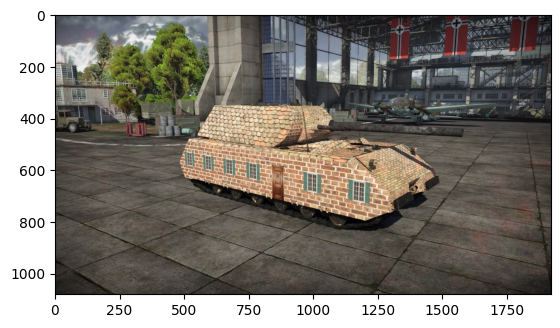

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Đọc ảnh từ file
image = Image.open('/content/E6TKzqA.jpg')
image = np.array(image)

#Hiển thị ảnh
plt.imshow(image)
plt.show()

In [9]:
def rgb_to_ycbcr(image):
  ycbcr_image = np.zeros_like(image, dtype=np.float32)

  R = image[:, :, 0].astype(np.float32)
  G = image[:, :, 1].astype(np.float32)
  B = image[:, :, 2].astype(np.float32)

  Y = 0.299 * R + 0.587 * G + 0.114 * B
  Cb = 128 - 0.168736 * R - 0.331264 * G + 0.5 * B
  Cr = 128 + 0.5 * R - 0.418688 * G - 0.081312 * B

  ycbcr_image[:, :, 0] = Y
  ycbcr_image[:, :, 1] = Cb
  ycbcr_image[:, :, 2] = Cr

  return ycbcr_image

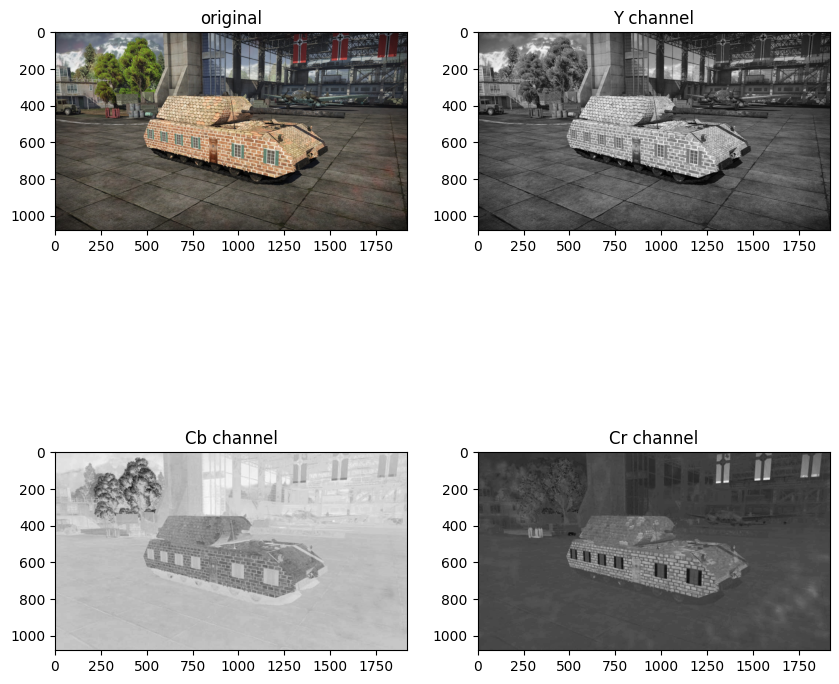

In [10]:
image_ycbcr = rgb_to_ycbcr(image)

# Tách các kênh
Y = image_ycbcr[:, :, 0]
Cb = image_ycbcr[:, :, 1]
Cr = image_ycbcr[:, :, 2]

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(image)
plt.title('original')
plt.axis('on')

plt.subplot(2,2,2)
plt.imshow(Y, cmap='gray')
plt.title('Y channel')
plt.axis('on')

plt.subplot(2,2,3)
plt.imshow(Cb, cmap='gray')
plt.title('Cb channel')
plt.axis('on')

plt.subplot(2,2,4)
plt.imshow(Cr, cmap='gray')
plt.title('Cr channel')
plt.axis('on')

plt.show()

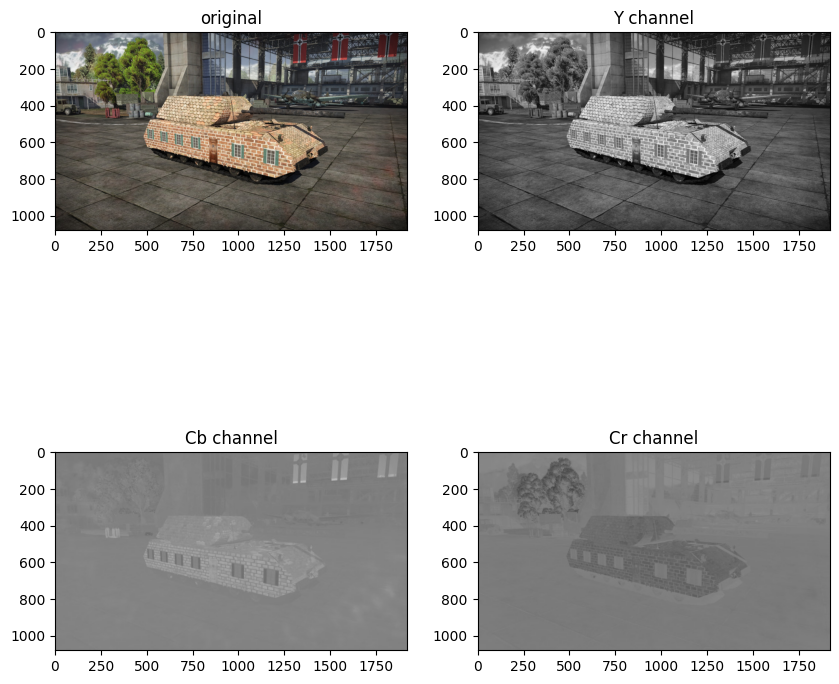

In [11]:
# OPENCV
import cv2
image = cv2.imread('/content/E6TKzqA.jpg')
image_ycbcr = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
Y, Cb, Cr = cv2.split(image_ycbcr)

# Tạo các ảnh
Y_image = cv2.merge([Y,Y,Y])
Cb_image = cv2.merge([Cb,Cb,Cb])
Cr_image = cv2.merge([Cr,Cr,Cr])

# Hiển thị
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('original')

plt.subplot(2,2,2)
plt.imshow(Y_image, cmap='gray')
plt.title('Y channel')

plt.subplot(2,2,3)
plt.imshow(Cb_image, cmap='gray')
plt.title('Cb channel')

plt.subplot(2,2,4)
plt.imshow(Cr_image, cmap='gray')
plt.title('Cr channel')

plt.show()
